In [4]:
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
dataset1 = '../data/AirVisual Data Dump.csv'
datasetAirPort = '../data/airportdata.csv'

In [8]:
data = pd.read_csv(dataset1)
dataPort = pd.read_csv(datasetAirPort)

In [9]:
data["City"].fillna("Karachi", inplace = True)

In [10]:
data.Datetime = pd.to_datetime(data['Datetime'])
data['weekday'] = data['Datetime'].dt.dayofweek
data['weekdayName'] = data.Datetime.dt.day_name()
data['hour'] = data.Datetime.dt.hour
data['month'] = data.Datetime.dt.month
data['year'] = data.Datetime.dt.year
data['dayofmonth'] = data.Datetime.dt.day

In [11]:
dataP = dataPort.drop(['gust_mph', 'peak_wind_gust_mph'], axis = 1)

In [12]:
dataP['datetime'] = pd.to_datetime(dataP.valid)
dataP['datetime'] = dataP['datetime'].dt.round('H')

In [13]:
# OPFA Faisalabad
# OPKC Karachi
# OPLA Lahore
# OPPS Peshawar
# OPRN Islamabad
serialToCity = {'OPFA': 'Faisalabad', 'OPKC': 'Karachi', 'OPLA': 'Lahore', 'OPPS': 'Peshawar', 'OPRN': 'Islamabad'}

In [14]:
dataP['City'] = dataP.station.apply(lambda x : serialToCity[x])
dataA = dataP.drop(['valid','station', 'lon', 'lat'], axis = 1)
dataAmean = dataA.groupby(['City', 'datetime']).mean()

In [16]:
dfmerged = data.merge( dataAmean, how = 'left', left_on = ['Datetime', 'City'], right_on = ['datetime', 'City'])
dfmerged.to_csv('../data/dataCLean.csv')

In [0]:
df = dfmerged.drop(['longitude', 'latitude'], axis = 1)
df.corr('pearson')

,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,hour,month,year,dayofmonth,tmpc,relh,drct,sped,vsby
PM2.5,1.000000,0.981972,0.028740,-0.082070,0.062484,0.029526,0.016961,-0.003523,-0.027700,0.029919,0.077552,0.028662,-0.052282,0.015523,-0.039781,-0.049509,-0.147652
USAQI,0.981972,1.000000,0.033964,-0.111019,0.036400,0.072865,0.068662,-0.003716,-0.027461,0.015564,0.091346,0.025104,-0.079506,-0.008107,-0.071768,-0.078174,-0.202553
CO2,0.028740,0.033964,1.000000,-0.173334,-0.167704,0.063214,0.080631,-0.009809,0.042070,-0.005703,-0.140071,0.009270,-0.198874,0.008818,-0.127681,-0.145267,-0.126561
Temperature,-0.082070,-0.111019,-0.173334,1.000000,-0.065059,-0.315053,-0.347478,-0.000261,0.174570,0.196425,0.147730,0.008703,0.744362,-0.075547,0.254280,0.342160,0.277008
RelativeHumidity,0.062484,0.036400,-0.167704,-0.065059,1.000000,-0.282022,-0.362638,-0.009743,-0.142643,0.213105,0.130954,-0.015409,0.169734,0.612875,0.158143,0.136961,-0.082310
Outdoor PM2.5,0.029526,0.072865,0.063214,-0.315053,-0.282022,1.000000,0.937875,0.002019,-0.068443,-0.036980,-0.322479,-0.029605,-0.323867,-0.215789,-0.273062,-0.202675,-0.220832
OutdoorUSAQI,0.016961,0.068662,0.080631,-0.347478,-0.362638,0.937875,1.000000,-0.006308,-0.051618,-0.072605,-0.385460,-0.019142,-0.366617,-0.270268,-0.328373,-0.237670,-0.247635
weekday,-0.003523,-0.003716,-0.009809,-0.000261,-0.009743,0.002019,-0.006308,1.000000,-0.001271,0.004777,-0.003999,-0.007662,0.001442,-0.010398,0.007523,-0.008554,0.018850
hour,-0.027700,-0.027461,0.042070,0.174570,-0.142643,-0.068443,-0.051618,-0.001271,1.000000,-0.001491,0.001458,-0.001141,-0.072650,0.101517,0.039589,-0.018483,0.122579
month,0.029919,0.015564,-0.005703,0.196425,0.213105,-0.036980,-0.072605,0.004777,-0.001491,1.000000,-0.323392,-0.041651,0.152660,0.149167,-0.078198,0.014370,-0.112653


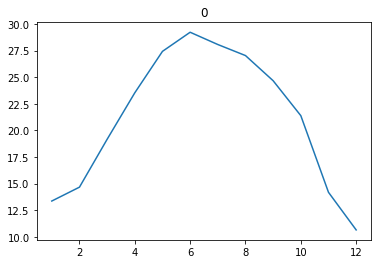

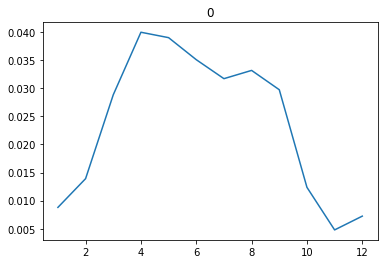

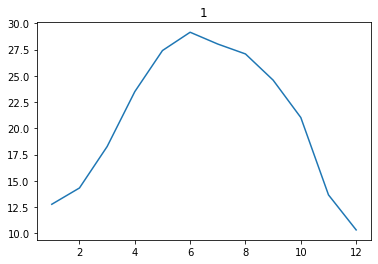

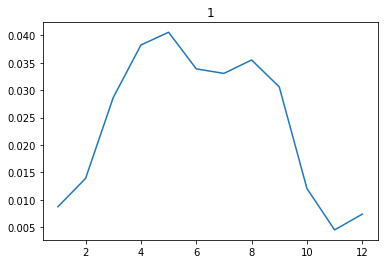

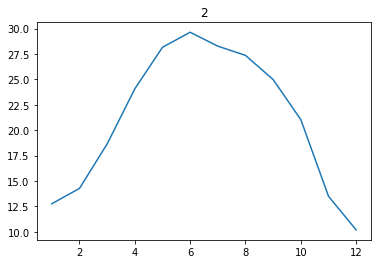

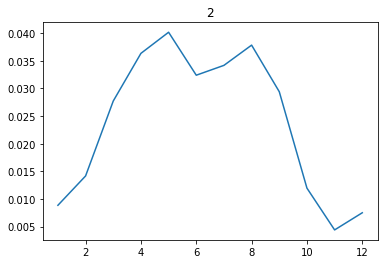

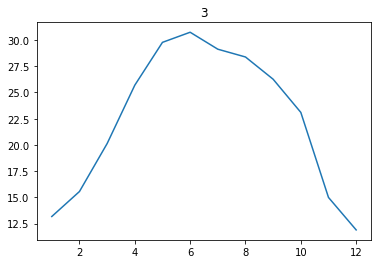

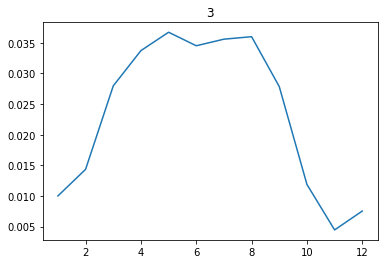

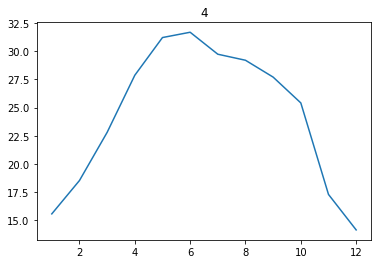

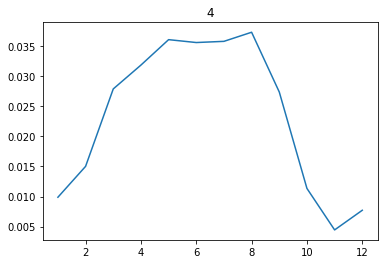

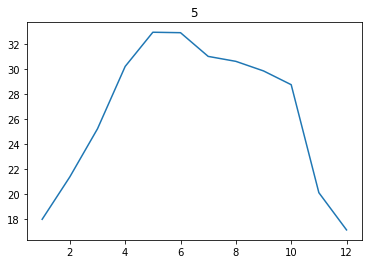

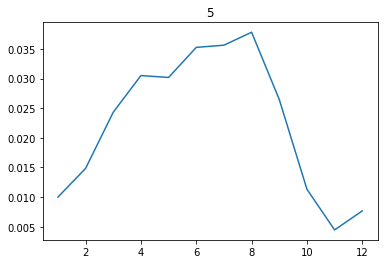

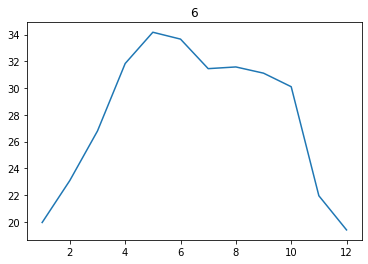

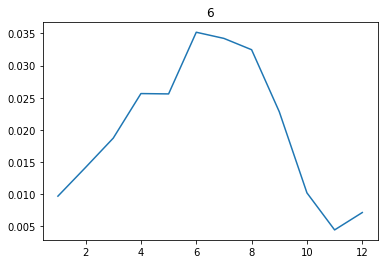

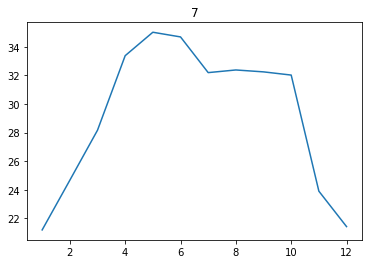

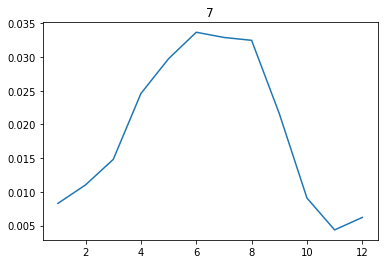

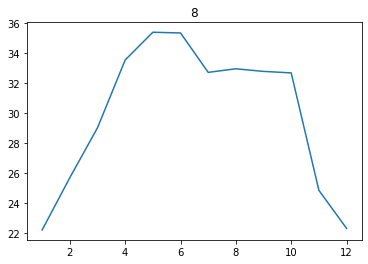

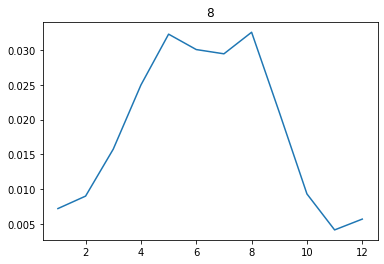

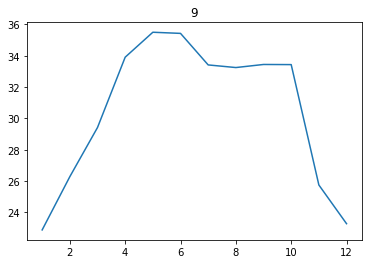

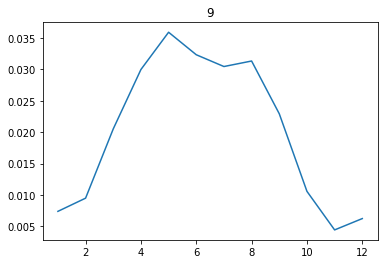

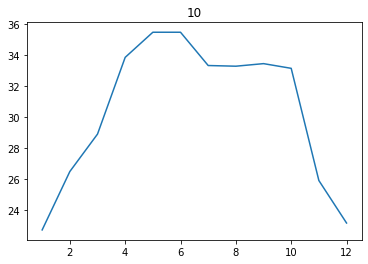

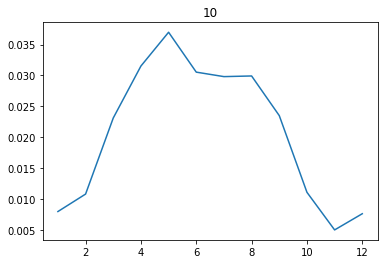

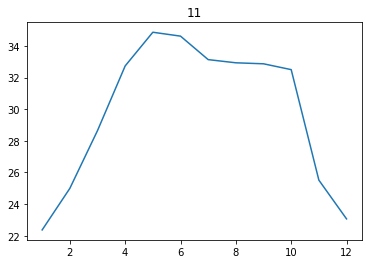

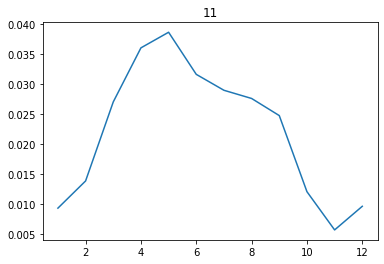

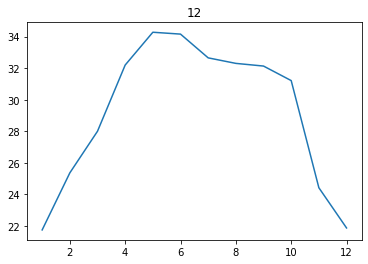

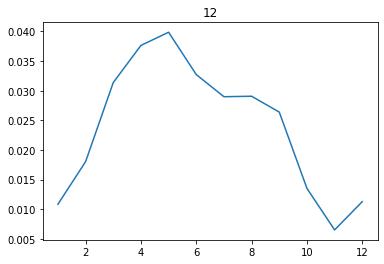

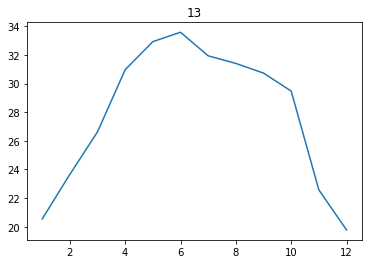

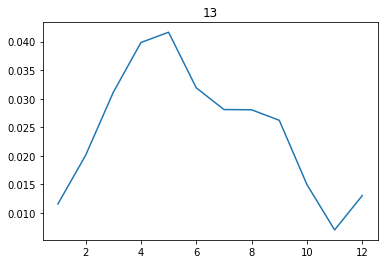

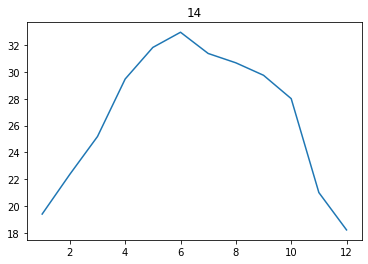

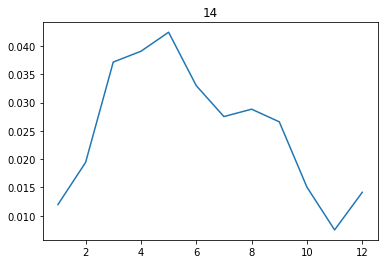

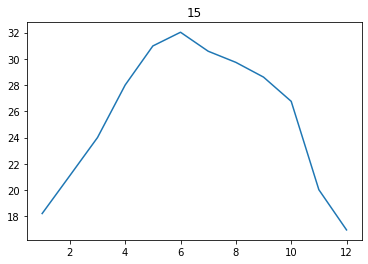

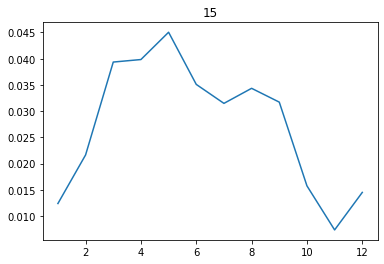

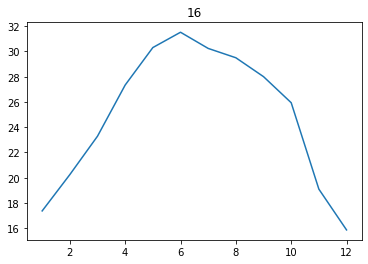

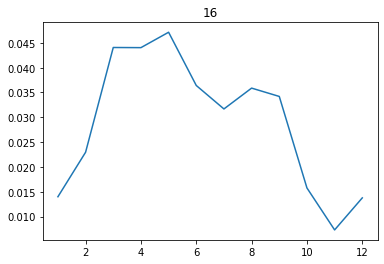

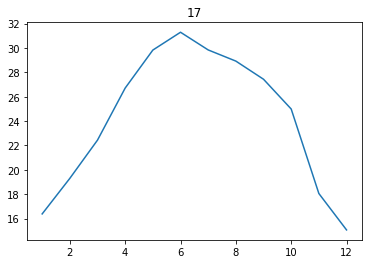

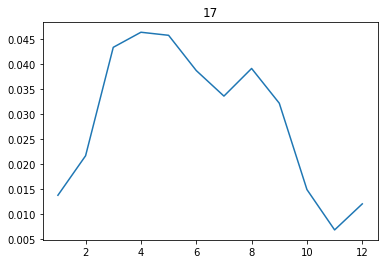

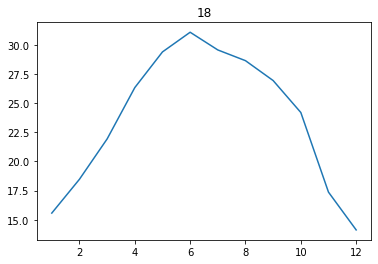

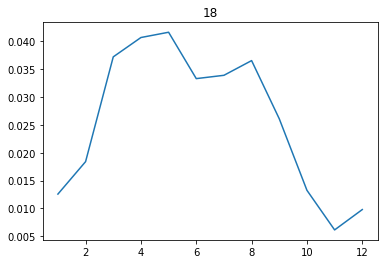

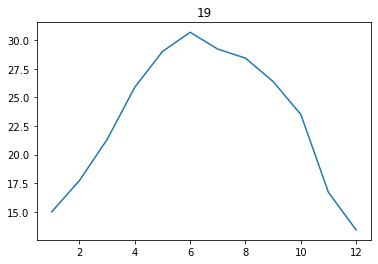

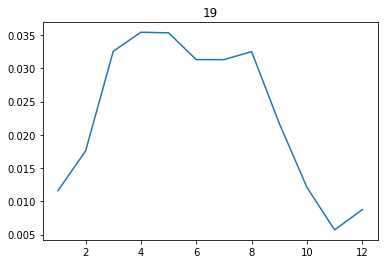

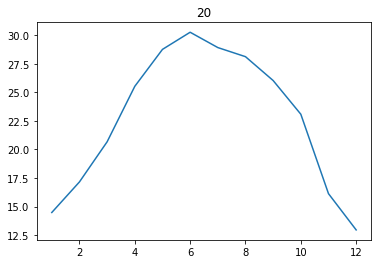

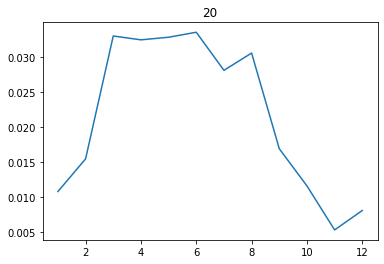

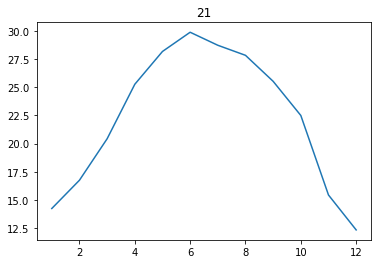

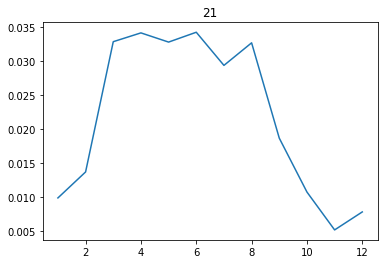

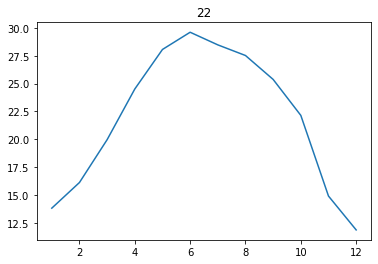

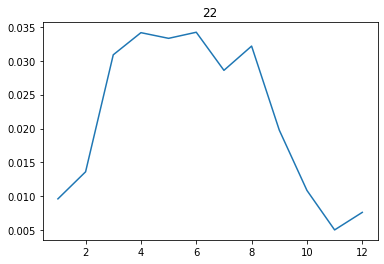

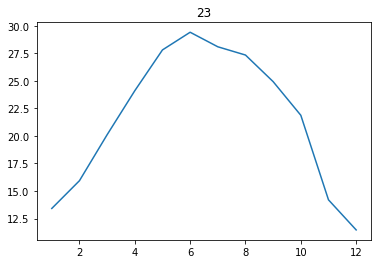

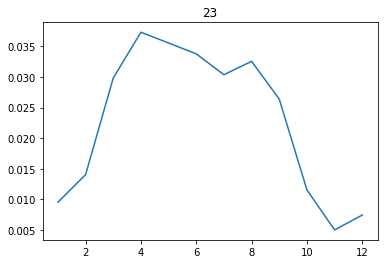

In [0]:
df17 = df[df.year == 2017]

for i in range(24):    
    df17m1 = df17[df17.hour == i]
    plt.plot(df17m1.groupby('month').mean().tmpc, label = i)
    plt.title(i)
    plt.show()
    plt.plot(1/df17m1.groupby('month').mean()['PM2.5'], label = 1)
    plt.title(i)
    plt.show()

In [0]:
df17m = df17[df17.month.isin([10,11,12,1])]
df17mw = df17m[df17m.weekday.isin(range(0,7))]
df17mw[df17mw.hour.isin(range(0,24))].corr('spearman')

,SerialNumber,City,Name,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,weekdayName,hour,month,year,dayofmonth,tmpc,relh,drct,sped,vsby
0,4ypxth4,Karachi,Defence Housing Authority,2016-10-20 18:00:00,2017-11-07 13:00:00,28.0,84,411.0,31.0,59.0,NaN,NaN,1,Tuesday,13,11,2017,7,29.0,45.675,235.0,6.900,3.73
1,4ypxth4,Karachi,Defence Housing Authority,2016-10-20 18:00:00,2017-11-07 12:00:00,36.0,102,413.0,30.0,62.0,NaN,NaN,1,Tuesday,12,11,2017,7,31.5,31.370,235.0,8.625,3.73
2,4ypxth4,Karachi,Defence Housing Authority,2016-10-20 18:00:00,2017-11-07 11:00:00,46.0,127,416.0,30.0,63.0,NaN,NaN,1,Tuesday,11,11,2017,7,33.0,26.100,235.0,9.775,3.73
3,4ypxth4,Karachi,Defence Housing Authority,2016-10-20 18:00:00,2017-11-07 10:00:00,46.0,127,419.0,29.0,58.0,NaN,NaN,1,Tuesday,10,11,2017,7,34.0,23.040,235.0,10.925,3.73
4,4ypxth4,Karachi,Defence Housing Authority,2016-10-20 18:00:00,2017-11-07 09:00:00,88.0,168,432.0,27.0,70.0,NaN,NaN,1,Tuesday,9,11,2017,7,34.0,26.310,250.0,7.475,3.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103039,u7cwkla,Islamabad,Sector E11,2017-02-23 20:00:00,2017-01-01 04:00:00,143.0,196,476.0,22.0,61.0,51.0,139.0,6,Sunday,4,1,2017,1,NaN,NaN,NaN,NaN,NaN
103040,u7cwkla,Islamabad,Sector E11,2017-02-23 20:00:00,2017-01-01 03:00:00,149.0,199,486.0,22.0,63.0,57.4,152.0,6,Sunday,3,1,2017,1,NaN,NaN,NaN,NaN,NaN
103041,u7cwkla,Islamabad,Sector E11,2017-02-23 20:00:00,2017-01-01 02:00:00,159.0,209,492.0,22.0,65.0,61.4,154.0,6,Sunday,2,1,2017,1,NaN,NaN,NaN,NaN,NaN
103042,u7cwkla,Islamabad,Sector E11,2017-02-23 20:00:00,2017-01-01 01:00:00,173.0,223,505.0,22.0,67.0,61.4,154.0,6,Sunday,1,1,2017,1,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0.08679882651680337

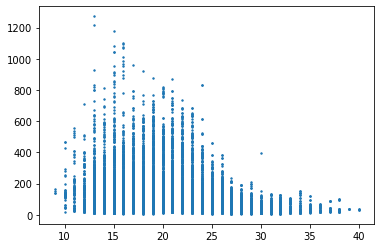

In [0]:
dfnew = df17mw[df17mw.hour.isin(range(0,24))]

dfq = df17mw[["PM2.5", "Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]]
dfx = dfq[["PM2.5", "Temperature"]]
dfx.corr("spearman")

dfx.dropna(inplace = True)
from sklearn.linear_model import LinearRegression

X = dfx.drop("PM2.5", axis = 1)
Y = dfx["PM2.5"]

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

from matplotlib import pyplot as plt

plt.scatter(X, Y, s=2)

from sklearn import metrics
metrics.r2_score(Y, Y_pred)

In [0]:
df17new = df[df.year == 2017]
df17model = df[df.year == 2017]
df17model.dropna(inplace = True)

df17new = df17new[df17new.month.isin([10,11,12,1])]
dfnewday = df17new.groupby(['dayofmonth']).mean()
dfq1 = dfnewday[["PM2.5", "Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]]
dfq1.to_csv("Oct-Jan17")


dfx = dfq1[["PM2.5", "Temperature"]]
X = dfx.drop("PM2.5", axis = 1)
Y = dfx["PM2.5"]
#plt.scatter(X, Y, s=2)
'''
for i in range(1, 32):
    X = dfx[dfx.index == i].drop("PM2.5", axis = 1)
    Y = dfx[dfx.index == i]["PM2.5"]
    display()
    plt.scatter(X, Y, s=2)
    plt.title(i)
    plt.show()
    '''

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

from matplotlib import pyplot as plt


from sklearn import metrics
metrics.r2_score(Y, Y_pred)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.4777213518821757

In [0]:
df17new = df[df.year == 2017]
#dfnewday = df17new.groupby(['dayofmonth']).mean()
dfq1 = df17new[["month", "dayofmonth", "PM2.5", "Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]]
dfq1.dropna(inplace = True)
df10 = dfq1[dfq1.month.isin([10,11,12,1])]
df10.drop("month", axis =1, inplace=True)
display(df10.info())
df10.to_csv("Oct-Jan17", index=False)

df2 = dfq1[dfq1.month.isin([2,6])]
df2.drop("month", axis =1, inplace=True)
display(df2.head())
df2.to_csv("Feb-May17", index=False)


df6 = dfq1[dfq1.month.isin([6,10])]
df6.drop("month", axis =1, inplace=True)
display(df6.info())
df6.to_csv("June-Sept17", index=False)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 15439 entries, 0 to 103013
Data columns (total 8 columns):
dayofmonth          15439 non-null int64
PM2.5               15439 non-null float64
Temperature         15439 non-null float64
CO2                 15439 non-null float64
RelativeHumidity    15439 non-null float64
drct                15439 non-null float64
sped                15439 non-null float64
vsby                15439 non-null float64
dtypes: float64(7), int64(1)
memory usage: 1.1 MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


None

,dayofmonth,PM2.5,Temperature,CO2,RelativeHumidity,drct,sped,vsby
3009,30,22.0,26.0,439.0,95.0,0.0,0.00,2.49
3010,29,9.0,30.0,408.0,81.0,100.0,13.80,0.62
3014,29,19.0,32.0,416.0,72.0,0.0,0.00,2.49
3015,29,24.0,32.0,410.0,78.0,115.0,19.55,0.56
3018,29,23.0,29.0,413.0,85.0,290.0,25.30,4.35


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 158 to 100331
Data columns (total 8 columns):
dayofmonth          7398 non-null int64
PM2.5               7398 non-null float64
Temperature         7398 non-null float64
CO2                 7398 non-null float64
RelativeHumidity    7398 non-null float64
drct                7398 non-null float64
sped                7398 non-null float64
vsby                7398 non-null float64
dtypes: float64(7), int64(1)
memory usage: 520.2 KB


None

In [0]:
df18 = df[df.year == 2018]
df18m = df18[df18.month.isin(range(2,6))]
#df18m[df18m.hour.isin(range(0,6))].corr('pearson')
\


In [0]:
df17new = df[df.year == 2017]
df17model = df[df.year == 2017]
df17model.dropna(inplace = True)

df17new = df17new[df17new.month.isin([10,11,12,1])]
dfnewday = df17new.groupby(['month','dayofmonth',]).mean()
dfq1 = dfnewday[["PM2.5", "Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]]
dfq1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


PM2.5  Temperature  ...      sped      vsby
month dayofmonth                           ...                    
1     1           145.502347    22.741784  ...  9.081250  2.224891
      2           150.209424    22.513089  ...  6.402865  2.517760
      3           185.770408    22.265306  ...  3.008102  1.722546
      4           177.888325    22.796954  ...  2.668202  1.134342
      5           137.212963    22.282407  ...  6.037500  1.865833
...                      ...          ...  ...       ...       ...
12    27          146.890244    19.548780  ...  3.100208  2.255198
      28          198.573171    19.335366  ...  5.534216  2.235651
      29          149.448485    19.333333  ...  5.658924  2.904515
      30          130.791667    19.159722  ...  3.908333  2.990616
      31          157.632000    19.720000  ...  3.923529  2.543543

[123 rows x 7 columns]

In [0]:
df[df.year == 2017]

,SerialNumber,City,Name,FirstOnline,Datetime,PM2.5,USAQI,CO2,Temperature,RelativeHumidity,Outdoor PM2.5,OutdoorUSAQI,weekday,weekdayName,hour,month,year,dayofmonth,tmpc,relh,drct,sped,vsby
0,4ypxth4,Karachi,Defence Housing Authority,2016-10-20 18:00:00,2017-11-07 13:00:00,28.0,84,411.0,31.0,59.0,NaN,NaN,1,Tuesday,13,11,2017,7,29.0,45.675,235.0,6.900,3.73
1,4ypxth4,Karachi,Defence Housing Authority,2016-10-20 18:00:00,2017-11-07 12:00:00,36.0,102,413.0,30.0,62.0,NaN,NaN,1,Tuesday,12,11,2017,7,31.5,31.370,235.0,8.625,3.73
2,4ypxth4,Karachi,Defence Housing Authority,2016-10-20 18:00:00,2017-11-07 11:00:00,46.0,127,416.0,30.0,63.0,NaN,NaN,1,Tuesday,11,11,2017,7,33.0,26.100,235.0,9.775,3.73
3,4ypxth4,Karachi,Defence Housing Authority,2016-10-20 18:00:00,2017-11-07 10:00:00,46.0,127,419.0,29.0,58.0,NaN,NaN,1,Tuesday,10,11,2017,7,34.0,23.040,235.0,10.925,3.73
4,4ypxth4,Karachi,Defence Housing Authority,2016-10-20 18:00:00,2017-11-07 09:00:00,88.0,168,432.0,27.0,70.0,NaN,NaN,1,Tuesday,9,11,2017,7,34.0,26.310,250.0,7.475,3.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103039,u7cwkla,Islamabad,Sector E11,2017-02-23 20:00:00,2017-01-01 04:00:00,143.0,196,476.0,22.0,61.0,51.0,139.0,6,Sunday,4,1,2017,1,NaN,NaN,NaN,NaN,NaN
103040,u7cwkla,Islamabad,Sector E11,2017-02-23 20:00:00,2017-01-01 03:00:00,149.0,199,486.0,22.0,63.0,57.4,152.0,6,Sunday,3,1,2017,1,NaN,NaN,NaN,NaN,NaN
103041,u7cwkla,Islamabad,Sector E11,2017-02-23 20:00:00,2017-01-01 02:00:00,159.0,209,492.0,22.0,65.0,61.4,154.0,6,Sunday,2,1,2017,1,NaN,NaN,NaN,NaN,NaN
103042,u7cwkla,Islamabad,Sector E11,2017-02-23 20:00:00,2017-01-01 01:00:00,173.0,223,505.0,22.0,67.0,61.4,154.0,6,Sunday,1,1,2017,1,NaN,NaN,NaN,NaN,NaN


In [0]:
df17new = df[df.year == 2017]
df17model = df[df.year == 2017]
df17model.dropna(inplace = True)

df17new = df17new[df17new.month.isin([2,3,4,5])]
dfnewday = df17new.groupby(['month','dayofmonth']).mean()
dfq2 = dfnewday[["PM2.5", "Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]]
dfq2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


PM2.5  Temperature  ...       sped      vsby
month dayofmonth                           ...                     
2     1            82.919192    21.333333  ...   3.612384  2.846215
      2           123.674419    21.209302  ...   4.271429  2.974032
      3           146.815217    20.902174  ...   4.993421  2.378333
      4            66.175926    20.189815  ...  15.664832  3.376247
      5            48.384259    19.657407  ...   9.658497  3.834575
...                      ...          ...  ...        ...       ...
5     27           31.370370    32.217593  ...  11.465900  3.920184
      28           42.131455    32.004695  ...  10.580518  3.121532
      29           36.618090    31.819095  ...   7.039155  3.463162
      30           36.101852    31.620370  ...   8.230952  3.278509
      31           34.777778    30.305556  ...   9.390512  3.218052

[120 rows x 7 columns]

In [0]:
df17new = df[df.year == 2017]
df17model = df[df.year == 2017]
df17model.dropna(inplace = True)

df17new = df17new[df17new.month.isin([6,7,8,9])]
dfnewday = df17new.groupby(['month','dayofmonth']).mean()
dfq3 = dfnewday[["PM2.5", "Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]]
dfq3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


PM2.5  Temperature  ...       sped      vsby
month dayofmonth                          ...                     
6     1           36.882353    30.529412  ...   7.968764  2.885541
      2           48.635922    31.038835  ...   8.077901  3.154937
      3           50.476852    32.199074  ...   7.042730  3.237518
      4           40.148148    32.453704  ...  10.020757  3.507485
      5           40.014925    33.343284  ...  12.404779  3.715147
...                     ...          ...  ...        ...       ...
9     26          60.958333    28.458333  ...   6.637143  2.979619
      27          52.402778    28.402778  ...   5.648529  3.018824
      28          55.680556    28.166667  ...   6.233216  2.992864
      29          59.148148    29.018519  ...   3.781731  3.064615
      30          56.333333    29.687500  ...   4.156771  3.045069

[122 rows x 7 columns]

In [0]:
df17new = df[df.year == 2017]
df17model = df[df.year == 2017]
df17model.dropna(inplace = True)

df17new = df17new[df17new.month.isin([10,11,12,1])]
dfnewday = df17new.groupby(['dayofmonth']).mean()
dfq1 = dfnewday[["PM2.5", "Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]]
import itertools
l = ["Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]
l2 = []
for i in range(0, len(l)+1):
    for subset in itertools.combinations(l, i):
        l2.append(subset)
from sklearn import metrics
R2s = []
for j in l2:
  l3 = ["PM2.5"]
  if j != ():
    for k in j:
      l3.append(str(k))
    dfx = dfq1[l3]
    X = dfx.drop("PM2.5", axis = 1)
    Y = dfx["PM2.5"]
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X) 
    R2 = metrics.r2_score(Y, Y_pred)
    R2s.append((l3[1:],R2))
for l in R2s:
  print(l)
  print()


'''
dfx = dfq1[["PM2.5", "CO2"]]
X = dfx.drop("PM2.5", axis = 1)
Y = dfx["PM2.5"]
#plt.scatter(X, Y, s=2)


for i in range(1, 32):
    X = dfx[dfx.index == i].drop("PM2.5", axis = 1)
    Y = dfx[dfx.index == i]["PM2.5"]
    display()
    plt.scatter(X, Y, s=2)
    plt.title(i)
    plt.show()
'''

from matplotlib import pyplot as plt



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[(['Temperature'], 0.4777213518821757), (['CO2'], 0.03510009915487611), (['RelativeHumidity'], 0.12132074215611843), (['drct'], 0.43332339492255134), (['sped'], 0.6666555289435486), (['vsby'], 0.6061822912328754), (['Temperature', 'CO2'], 0.47831996560247236), (['Temperature', 'RelativeHumidity'], 0.5134983557954933), (['Temperature', 'drct'], 0.5701272295577942), (['Temperature', 'sped'], 0.7803168367292797), (['Temperature', 'vsby'], 0.6819984002318319), (['CO2', 'RelativeHumidity'], 0.14754507886637547), (['CO2', 'drct'], 0.4344290065041754), (['CO2', 'sped'], 0.674953797131969), (['CO2', 'vsby'], 0.6062975273274049), (['RelativeHumidity', 'drct'], 0.4556710917555229), (['RelativeHumidity', 'sped'], 0.6915174183504318), (['RelativeHumidity', 'vsby'], 0.6380088582827921), (['drct', 'sped'], 0.7070394372212749), (['drct', 'vsby'], 0.655398911035171), (['sped', 'vsby'], 0.7923848750049798), (['Temperature', 'CO2', 'RelativeHumidity'], 0.5139346438837018), (['Temperature', 'CO2', 'drct'

In [0]:
df17new = df[df.year == 2017]
df17model = df[df.year == 2017]
df17model.dropna(inplace = True)

df17new = df17new[df17new.month.isin([2,3,4,5])]
dfnewday = df17new.groupby(['dayofmonth']).mean()
dfq1 = dfnewday[["PM2.5", "Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]]
import itertools
l = ["Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]
l2 = []
for i in range(0, len(l)+1):
    for subset in itertools.combinations(l, i):
        l2.append(subset)
from sklearn import metrics
R2s = []
for j in l2:
  l3 = ["PM2.5"]
  if j != ():
    for k in j:
      l3.append(str(k))
    dfx = dfq1[l3]
    X = dfx.drop("PM2.5", axis = 1)
    Y = dfx["PM2.5"]
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X) 
    R2 = metrics.r2_score(Y, Y_pred)
    R2s.append((l3[1:],R2))
for l in R2s:
  print(l)
  print()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(['Temperature'], 0.15346339350774407)

(['CO2'], 0.02163193003374786)

(['RelativeHumidity'], 0.08053440733268336)

(['drct'], 0.36867371902366997)

(['sped'], 0.07678634319434774)

(['vsby'], 0.2320799293613207)

(['Temperature', 'CO2'], 0.1585153975411414)

(['Temperature', 'RelativeHumidity'], 0.1591378061599199)

(['Temperature', 'drct'], 0.4279715822199408)

(['Temperature', 'sped'], 0.19737845279952249)

(['Temperature', 'vsby'], 0.3322104538045576)

(['CO2', 'RelativeHumidity'], 0.08063701266835377)

(['CO2', 'drct'], 0.3863524146080891)

(['CO2', 'sped'], 0.08087172014653443)

(['CO2', 'vsby'], 0.254086022460718)

(['RelativeHumidity', 'drct'], 0.4078197874585804)

(['RelativeHumidity', 'sped'], 0.13619606914915816)

(['RelativeHumidity', 'vsby'], 0.3070262195818113)

(['drct', 'sped'], 0.4638497884830326)

(['drct', 'vsby'], 0.4777321177812458)

(['sped', 'vsby'], 0.29649108438437666)

(['Temperature', 'CO2', 'RelativeHumidity'], 0.17009526397624897)

(['Temperature', 'CO2', 

In [0]:
df17new = df[df.year == 2017]
df17model = df[df.year == 2017]
df17model.dropna(inplace = True)

df17new = df17new[df17new.month.isin([6,7,8,9])]
dfnewday = df17new.groupby(['dayofmonth']).mean()
dfq1 = dfnewday[["PM2.5", "Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]]
import itertools
l = ["Temperature", "CO2", "RelativeHumidity", "drct", "sped", "vsby"]
l2 = []
for i in range(0, len(l)+1):
    for subset in itertools.combinations(l, i):
        l2.append(subset)
from sklearn import metrics
R2s = []
for j in l2:
  l3 = ["PM2.5"]
  if j != ():
    for k in j:
      l3.append(str(k))
    dfx = dfq1[l3]
    X = dfx.drop("PM2.5", axis = 1)
    Y = dfx["PM2.5"]
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X) 
    R2 = metrics.r2_score(Y, Y_pred)
    R2s.append((l3[1:],R2))
for l in R2s:
  print(l)
  print()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(['Temperature'], 0.027675362531373926)

(['CO2'], 0.0011366204025621274)

(['RelativeHumidity'], 0.00017620841339871518)

(['drct'], 0.23271211740788034)

(['sped'], 0.1995838474490883)

(['vsby'], 0.28049658901809904)

(['Temperature', 'CO2'], 0.044486919139321124)

(['Temperature', 'RelativeHumidity'], 0.03403126309529614)

(['Temperature', 'drct'], 0.2800322626200378)

(['Temperature', 'sped'], 0.2922920490158133)

(['Temperature', 'vsby'], 0.39131524304213294)

(['CO2', 'RelativeHumidity'], 0.001312973879806667)

(['CO2', 'drct'], 0.23344012750362397)

(['CO2', 'sped'], 0.20867978614477234)

(['CO2', 'vsby'], 0.2831448295359691)

(['RelativeHumidity', 'drct'], 0.3187763211508947)

(['RelativeHumidity', 'sped'], 0.2534516803277954)

(['RelativeHumidity', 'vsby'], 0.3408995795160522)

(['drct', 'sped'], 0.2512151015540317)

(['drct', 'vsby'], 0.33200326945915903)

(['sped', 'vsby'], 0.34010081162400985)

(['Temperature', 'CO2', 'RelativeHumidity'], 0.056658427754325835)

(['Temperat